In [1]:
import nilearn
from nilearn import image, plotting
import pandas
import numpy as np
import time
import psutil
from models import batched_linear_regression
from utils.dataloading import NiftiLazyLoader

In [5]:
# read numpy file 
metrics = np.load('../tmp/metrics_beta_tests.npy', allow_pickle=True).item()

In [ ]:
print(metrics)

{'ols_no_space_correlation_float32_mae': np.float64(9.400042118488027), 'ols_no_space_correlation_float32_mse': np.float64(101.28476364827159), 'ols_no_space_correlation_float32_std_diff': np.float64(3.595050469444134), 'ridge_no_space_correlation_float32_mae': np.float64(5.7236523466347125), 'ridge_no_space_correlation_float32_mse': np.float64(44.85653754435576), 'ridge_no_space_correlation_float32_std_diff': np.float64(3.7715913416758418), 'irls_no_space_correlation_float32_mae': np.float64(9.400063662974715), 'irls_no_space_correlation_float32_mse': np.float64(101.28516936805275), 'irls_no_space_correlation_float32_std_diff': np.float64(3.595050567981386), 'ols_space_correlation_float32_mae': np.float64(9.033815783669503), 'ols_space_correlation_float32_mse': np.float64(117.81548913198836), 'ols_space_correlation_float32_std_diff': np.float64(6.022014350919099), 'ridge_space_correlation_float32_mae': np.float64(5.406983805842489), 'ridge_space_correlation_float32_mse': np.float64(45

: 

In [ ]:
import pandas as pd

# Load the TSV file
file_path = '..\\data\\output.tsv'  # Replace with the path to your TSV file
df = pd.read_csv(file_path, sep='\t')

# Strip the first 4 characters from each element in the column
df['participant_id'] = df['participant_id'].apply(lambda x: int(x[4:]) if isinstance(x, str) else x)

file_path_2 = '../BIDS_derivatives/BDD_Participants_Info.tsv'  # Path to the second TSV file
df2 = pd.read_csv(file_path_2, sep='\t')
# Perform the inner join on 'Id' and 'participant_id'
merged_df = pd.merge(df2, df, left_on='ID', right_on='participant_id', how='inner')

# Check for duplicates in the merged dataframe
merged_df = merged_df.drop_duplicates(subset=['ID', 'participant_id'])

# Drop the 'participant_id' column
merged_df = merged_df.drop(columns=['participant_id'])
print(merged_df)

# Save the result of the join to a new TSV file
output_path = '../BIDS_derivatives/participants.tsv'  # Replace with the desired output path
merged_df.to_csv(output_path, sep='\t', index=False)

        ID   Status  Gender Age_in_months  IDS-SR30-0_to_84  IDS-SR10_0_to_30  \
0    56556  Control  Female           286               5.0               1.0   
1    57775  Patient    Male           268              43.0              18.0   
4    57777  Patient  Female           484              63.0              27.0   
5    57790  Patient  Female           281              39.0              16.0   
8    57792  Patient  Female           330              41.0              16.0   
..     ...      ...     ...           ...               ...               ...   
562  60234  Patient  Female           331              30.0              12.0   
563  60245  Patient  Female           547              49.0              22.0   
564  60247  Patient  Female           293              38.0              17.0   
565  60309  Patient    Male           260              44.0              20.0   
566  60313  Patient    Male           268              32.0              15.0   

     QIDS-SR16 -0_to_27  
0

In [ ]:
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Available (GB):', psutil.virtual_memory()[0]/1000000000)

RAM memory % used: 64.0
RAM Available (GB): 16.03620864


In [7]:
a = nilearn.image.load_img("../BIDS_derivatives/test_data/sub-56556_acq-MB2_MNI152NLin2009cAsym_desc-preproc_desc-OD_NODDI.nii")
b = nilearn.image.load_img("../BIDS_derivatives/test_data/sub-56556_acq-MB2_MNI152NLin2009cAsym_desc-preproc_desc-ICVF_NODDI.nii")
c = nilearn.image.load_img("../BIDS_derivatives/test_data/sub-56556_acq-MB2_MNI152NLin2009cAsym_desc-preproc_desc-ISOVF_NODDI.nii")
d = nilearn.image.load_img("../BIDS_derivatives/test_data/highres001_BrainExtractionBrain_trans_prob_1_trans.nii")
e = nilearn.image.load_img("../Figures/real_betas_ols_float32_run_filtering_ols_False_IDS-SR10_0_to_30.nii")

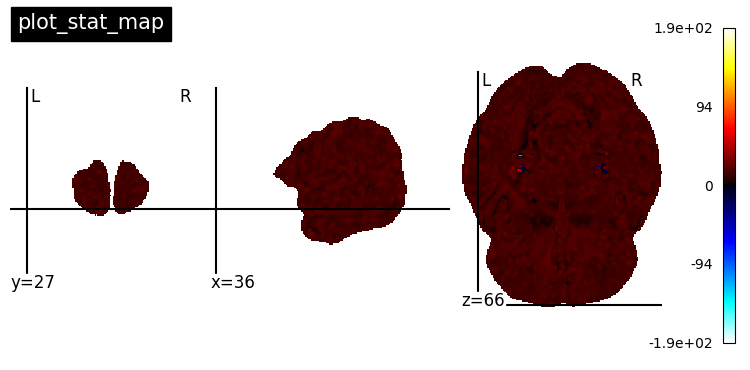

In [13]:
e_3d = image.index_img(e, 0)
plotting.plot_stat_map(
    e_3d,  bg_img=None,title="plot_stat_map", cut_coords=[36, 27, 66], threshold=1e-2
)

In [4]:
# Constants
m = 193*193*229 // 12  # Number of models
n = 200    # Number of data points per dataset
k = 6      # Number of features
lambda_reg = 0.1  # Regularization strength

# Data preparation
# Generate random datasets for all models
X = np.random.randn(m, n, k)  # Shape: (m, n, k)
Y = np.random.randn(m, n)     # Shape: (m, n)

# Add a column of ones to X for the bias term
# New X shape: (m, n, k + 1)
X = np.concatenate([np.ones((m, n, 1)), X], axis=2)

In [6]:
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Available (whole) (GB):', psutil.virtual_memory()[0]/1000000000)
print('RAM Available (GB):', psutil.virtual_memory()[4]/1000000000)

RAM memory % used: 78.1
RAM Available (whole) (GB): 16.03620864
RAM Available (GB): 3.508301824


In [ ]:
# Compute the results

# Compute X^T X and X^T Y for all models in a batch
t0 = time.time()
B = batched_linear_regression(X,Y,lambda_reg)

t1= time.time()
# B contains the coefficients (including bias) for all models
print(f"Shape of coefficients matrix: {B.shape}")  # Expected: (m, k+1)
print(f"Time f64:{t1-t0}")

Shape of coefficients matrix: (710835, 7)
Time f64:46.109721183776855


In [5]:
# Compute the results
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
t0 = time.time()
# Compute X^T X and X^T Y for all models in a batch
B_f32 = batched_linear_regression(X,Y,lambda_reg)
t1 = time.time()
# B contains the coefficients (including bias) for all models
print(f"Shape of coefficients matrix: {B_f32.shape}")  # Expected: (m, k+1)
print(f"Time f32:{t1-t0}")


Shape of coefficients matrix: (710835, 7)
Time f32:33.72251749038696


In [ ]:
del B, B_f32

# Compute the results
X_f16 = X.astype(np.float16)
Y_f16 = Y.astype(np.float16)


In [ ]:
t0 = time.time()
B_f16 = batched_linear_regression(X_f16,Y_f16,lambda_reg)
t1 = time.time()
# B contains the coefficients (including bias) for all models
print(f"Shape of coefficients matrix: {B_f16.shape}")  # Expected: (m, k+1)
print(f"Time f16:{t1-t0}")


KeyboardInterrupt: 

In [10]:
# Define dimensions
# Constants
m = 193*193*229 // 12  # Number of models
n = 200    # Number of data points per dataset
k = 6      # Number of features
lambda_reg = 0.1  # Regularization strength
# Generate random coefficients (including bias)
B_true = np.random.randn(m, k + 1)  # Shape: (m, k+1)

# Generate input features (including bias term)
X = np.random.randn(m, n, k)  # Shape: (m, n, k)
X = np.concatenate([np.ones((m, n, 1)), X], axis=-1)  # Add bias term

# Generate output with some noise
Y = np.einsum('mni,mi->mn', X, B_true) + 0.1 * np.random.randn(m, n)  # Shape: (m, n)

B_pred = batched_linear_regression(X,Y,lambda_reg)


In [8]:
from nilearn import image
import nibabel as nib
import numpy as np
import psutil
from glob import glob
import os
import gzip
import shutil
import pandas as pd

class NiftiLazyLoader(object):
    def __init__(self, data_filename_paterns, column_names_as_data, column_name_target, use_mask, dtype = np.float32, decompress = True):

        if decompress:
            self.extension = ".nii"
            process_subfolders_decompression("../BIDS_derivatives","sub-*",data_filename_paterns)
            if use_mask is not None:
                process_subfolders_decompression("../BIDS_derivatives","sub-*",[use_mask])
        else:
            self.extension = ".nii.gz"
        # List the columns you want to read (by name)
        columns_to_read = [*column_names_as_data,column_name_target]  # Replace with the actual column names

        #self.participants_data = pd.read_csv('participants.tsv', sep='\t', usecols=columns_to_read)
        self.data_filename_paterns = data_filename_paterns
        self.dtype = dtype
        self.k = 4  # Initialize k
        self.split_indices = None
        self.parameters = len(data_filename_paterns)

        if use_mask is not None:

            mask = image.load_img("../BIDS_derivatives/sub-*/"+use_mask+self.extension)

            mask = mask.get_fdata()

            print(f"Mask shape: {mask.shape}")

            # We calculate intersection of all masks
            mask = np.all(mask,axis=-1)

            # TODO implement this for data without mask
            self.mask_shape = mask.shape
            
            # calculate number of elements in mask which are True
            mask_num_el = np.sum(mask)
            #mask_num_el = mask.flatten().shape[0]
            print(f"Mask shape: {mask.shape}, Number of elements in mask: {mask_num_el}, out of {mask.size} elements")

            split_points = np.linspace(0, mask_num_el, self.k + 1, dtype=int)
            self.split_indices = [(split_points[i], split_points[i+1]) for i in range(self.k)] 
            #self.split_indices = np.array_split(mask_num_el, self.k)

        self.mask = mask if use_mask is not None else None
        self.mask_num_el = mask_num_el if use_mask is not None else None
        self.file_paths = []  # Initialize file_paths
        self.current_index = 0  # Initialize current_index
        self.batch_size = 1  # Initialize batch_size
        available_mem = psutil.virtual_memory()[4]

    # # create a generator to load and mask data without loading all elements into memory at once
    # def load_and_mask_data(self, k=1):
    #     data_filename_paterns = self.data_filename_paterns
    #     mask = self.mask
    #     for i in range(k):
    #         for data_filename_patern in data_filename_paterns:
    #             images = image.load_img(f"../../BIDS_derivatives/sub-*/{data_filename_patern}", dtype=self.dtype)
    #             all_data = []
    #             data = images.get_fdata()

    #             # check if broadcast is working
    #             if mask is not None:
    #                 data = data[mask]
    #             else:
    #                 data = np.reshape(data, (data.shape[0], -1))
    #                 #data = data.flatten(dim=(1,2,3))
    #             part_size = data.shape[1] // k
    #             all_data.append(data[:,i * part_size:(i + 1) * part_size])

    #         all_data = np.stack(all_data,axis=-1)
            
    #         yield all_data
    #         # Indicate the end of the inner loop

    def __next__(self):
        if self.current_index >= self.k:
            raise StopIteration

        data_filename_paterns = self.data_filename_paterns
        mask = self.mask
        all_data = []

        for data_filename_patern in data_filename_paterns:
            images = image.load_img(f"../BIDS_derivatives/sub-*/{data_filename_patern}"+self.extension, dtype=self.dtype)
            data = images.get_fdata()

            if mask is not None:
                data = data[mask]
            else:
                data = np.reshape(data, (-1,data.shape[-1]))
                if self.split_indices is None:
                    split_points = np.linspace(0, data.shape[0], self.k + 1, dtype=int)
                    self.split_indices = [(split_points[i], split_points[i+1]) for i in range(self.k)] 


            part_size = (data.shape[0] // self.k) + 1
            start, end = self.split_indices[self.current_index]
            all_data.append(data[start:end,:])
            #all_data.append(data[self.current_index * part_size:(self.current_index + 1) * part_size,:])

        all_data = np.stack(all_data, axis=-1)
        self.current_index += 1
        return all_data, self.split_indices[self.current_index-1]
        
    def __iter__(self):
        self.current_index = 0
        return self
    
    def __len__(self):
        return int(self.k)

def decompress_nii_gz(nii_gz_path):
    """Decompress a .nii.gz file and save as .nii in the same folder."""
    nii_path = nii_gz_path.rstrip('.gz')  # Remove the .gz extension
    with gzip.open(nii_gz_path, 'rb') as f_in:
        with open(nii_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    return nii_path

def process_subfolders_decompression(root_folder, folder_pattern, search_terms):
    """
    Process all subfolders matching folder_pattern in root_folder:
    - If a .nii file containing search_terms exists, do nothing.
    - Otherwise, find a .nii.gz file, decompress it, and save it.
    """
    # Find subfolders matching the pattern
    search_path = os.path.join(root_folder, folder_pattern)
    #print(search_path)
    subfolders = [d for d in glob(search_path) if os.path.isdir(d)]
    #print(subfolders)
    
    for folder in subfolders:
        for phrase in search_terms:
            # Search for all matching .nii files (already decompressed)
            nii_pattern = os.path.join(folder, f"{phrase}*.nii")

            nii_files = glob(nii_pattern)
            
            # Search for all matching .nii.gz files
            nii_gz_pattern = os.path.join(folder, f"{phrase}*.nii.gz")
            #print(f"{nii_gz_pattern=},{nii_pattern=}")
            nii_gz_files = glob(nii_gz_pattern)
            #print(nii_files,nii_gz_files)
            if not nii_files:
                decompress_nii_gz(nii_gz_files[0])

In [9]:
dataloader = NiftiLazyLoader(["anat/*MNI152NLin2009cAsym_label*GM_probseg","dwi/*MNI152NLin2009cAsym_desc*OD_NODDI","dwi/*MNI152NLin2009cAsym_desc*ISOVF_NODDI","dwi/*MNI152NLin2009cAsym_desc*ICVF_NODDI"],use_mask="anat/*MNI152NLin2009cAsym_desc*brain_mask",
                             column_name_target=[],column_names_as_data=[])

Mask shape: (193, 229, 193, 2)
Mask shape: (193, 229, 193), Number of elements in mask: 1906256, out of 8530021 elements


In [4]:
from models import batched_irls, batched_ols, batched_ridge, batched_lasso
from utils.random_betas_creation import create_random_vector

In [10]:
data_num_el = 193*193*229
a,b,c = dataloader.mask_shape
n_features = dataloader.parameters
mask = dataloader.mask
mask = np.where(mask)
target_betas = create_random_vector(a,b,c,n_features)
target_betas = target_betas[mask]
print(target_betas.shape)

reg_models = [batched_lasso]
output_names = ["lasso"]
affine = np.eye(4)

for reg_model,name in zip(reg_models,output_names):
    print(f"Running {name}")
    output_data = np.zeros((a,b,c,n_features+1))

    for data, indices in dataloader:
        print(data.shape)
        #print(target_betas[indices[0]:indices[1],:].shape)

        #print(np.ones((data.shape[0],1)).shape)

        data_with_bas = np.concatenate((np.ones((data.shape[0],data.shape[1],1)),data),axis=2)

        true_y = np.einsum('mni,mi->mn', data_with_bas, target_betas[indices[0]:indices[1],:])
        #print(true_y.shape)
        b_pred = reg_model(data_with_bas,true_y,dtype=np.float32)[0]
        b_pred = b_pred.squeeze()
        output_data[mask[0][indices[0]:indices[1]], mask[1][indices[0]:indices[1]], mask[2][indices[0]:indices[1]], :] = np.abs(b_pred - target_betas[indices[0]:indices[1], :])
        #output_data[mask][indices[0]:indices[1],:] = np.abs(b_pred-target_betas[indices[0]:indices[1],:])
        #output_data[np.ix_(mask, np.arange(output_data.shape[1]))][indices[0]:indices[1], :] = np.abs(b_pred - target_betas[indices[0]:indices[1], :])
        #print(np.max(np.abs(b_pred-target_betas[indices[0]:indices[1],:])))
        #print(np.max(np.abs(b_pred)))
        #print(output_data[mask][indices[0]:indices[1],:])
        nifti_img = nib.Nifti1Image(output_data, affine)

        # Save using nibabel
    nib.save(nifti_img, "../outputs/"+ name+".nii")
    


(1906256, 5)
Running lasso
(476564, 2, 4)
(476564, 2, 4)
(476564, 2, 4)
(476564, 2, 4)


KeyboardInterrupt: 

In [ ]:
from scipy.ndimage import gaussian_filter
from scipy.spatial import cKDTree
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

def smoothing_function(data, mask, model):
    if model == "mahalanobis":
        """
        Vectorized Mahalanobis distance-based smoothing using a Gaussian kernel.

        Parameters:
        - data: (a, b, c, n_features) numpy array
        - mask: (a, b, c) boolean numpy array (True for valid points)
        - kernel_sigma: Standard deviation for the Gaussian kernel
        - radius: Maximum distance to consider for local smoothing

        Returns:
        - Smoothed output data with the same shape as input.
        """
        radius=3.0
        space_scale = radius / 2  # You can adjust this for sharpness
        a, b, c, n_features = data.shape
        #output_data = np.zeros((a, b, c, n_features))
        #output_data[mask] = data

        # Extract valid points and their spatial coordinates
        coords = np.column_stack(np.where(mask))  # Shape: (N, 3) spatial indices
        #values = data # Shape: (N, n_features)

        # Build KD-Tree and find neighbors for all points at once
        tree = cKDTree(coords)
        neighbor_indices_list = tree.query_ball_point(coords, r=radius)

        # Vectorized computation
        smoothed_values = np.zeros_like(data)

        # Convert neighbor list to an efficient array format
        max_neighbors = max(len(n) for n in neighbor_indices_list)  # Find max neighborhood size
        neighbor_indices = np.full((len(coords), max_neighbors), -1)  # Placeholder for indices
        for i, n_indices in enumerate(neighbor_indices_list):
            neighbor_indices[i, :len(n_indices)] = n_indices  # Fill with neighbor indices

        # Get all neighbor values efficiently
        valid_mask = neighbor_indices != -1  # Mask for valid neighbors
        neighbor_values = np.zeros((len(coords), max_neighbors, n_features))
        #neighbor_values[valid_mask] = data[neighbor_indices[valid_mask]]
        for i, valid in enumerate(valid_mask):
            neighbor_values[i, valid] = data[tuple(coords[neighbor_indices[i, valid]].T)]

        # Compute covariance matrices in batches
        mean_local = np.mean(neighbor_values, axis=1, keepdims=True)  # Mean per local region
        diff_local = neighbor_values - mean_local  # Shape: (N, max_neighbors, n_features)
        
        def compute_local_covariance(diff_local, valid_mask):
            """
            Computes the local covariance matrices for each region.

            Parameters:
            - diff_local: (N, max_neighbors, n_features) array of differences from the mean
            - valid_mask: (N, max_neighbors) boolean mask indicating valid neighbors

            Returns:
            - cov_local: (N, n_features, n_features) array of covariance matrices
            """
            N, max_neighbors, n_features = diff_local.shape
            cov_local = np.zeros((N, n_features, n_features))

            for i in range(N):
                valid_diffs = diff_local[i][valid_mask[i]]  # Extract valid differences
                if valid_diffs.shape[0] > 1:  # Ensure at least two neighbors for covariance computation
                    cov_local[i] = np.cov(valid_diffs, rowvar=False)
                else:
                    cov_local[i] = np.eye(n_features)  # Default to identity matrix if insufficient neighbors

            return cov_local

        cov_local = compute_local_covariance(diff_local, valid_mask)

        # Compute covariance for each local region
        #cov_local = np.einsum('nij,nkj->nik', diff_local, diff_local) / (valid_mask.sum(axis=1, keepdims=True)[:, np.newaxis, np.newaxis] - 1)
        
        # Regularization to prevent singular covariance
        eye = np.eye(n_features)[np.newaxis, :, :]  # Identity matrix for all batches
        cov_local += 1e-5 * eye  # Regularization term

        # Compute inverse covariance matrices
        inv_cov_local = np.linalg.pinv(cov_local)

        # Compute Mahalanobis distances for all neighbors in parallel
        mahalanobis_distances = 1/(np.sqrt(np.einsum('nij,njk,nik->ni', diff_local, inv_cov_local, diff_local)) +1)

        # Create a Gaussian kernel based on the Euclidean distances

        # # Compute Euclidean distances between neighbors and the center pixel
        # neighbor_coords = coords[neighbor_indices[valid_mask]].reshape(len(coords), max_neighbors, 3)
        # diff_coords = neighbor_coords - coords[:, np.newaxis, :]
        # euclidean_distances = np.linalg.norm(diff_coords, axis=2)

        # # Create a Gaussian kernel based on the Euclidean distances
        # gaussian_kernel = np.exp(-0.5 * (euclidean_distances / space_scale) ** 2)
        neighbor_coords = np.zeros((len(coords), max_neighbors, 3))
        for i, valid in enumerate(valid_mask):
            neighbor_coords[i, valid] = coords[neighbor_indices[i, valid]]

        # Distance from each point to its neighbors
        deltas = neighbor_coords - coords[:, None, :]
        distances_sq = np.sum(deltas**2, axis=-1)

        # Compute Gaussian weights
        sigma = radius / 2  # You can adjust this for sharpness
        gaussian_weights = np.exp(-distances_sq / (2 * sigma**2))
        gaussian_weights *= valid_mask  # Zero out invalid weights

        # Apply Gaussian weights to neighbor values
        weighted_values = 1/(mahalanobis_distances + 1e-8) * gaussian_weights

        # Sum and normalize
        sum_weights = np.sum(weighted_values, axis=1, keepdims=True)
        sum_weights[sum_weights == 0] = 1  # Prevent division by zero
        smoothed_values_flat = np.sum(weighted_values[:, :, np.newaxis] * neighbor_values, axis=1) / sum_weights


        # Multiply the Gaussian kernel with the Mahalanobis distances
        #weights = smoothed_values_flat * mahalanobis_distances
        #weights = mahalanobis_distances

        # Normalize weights
        #weights_sum = np.sum(weights, axis=1, keepdims=True)
        #weights_sum[weights_sum == 0] = 1  # Prevent division by zero

        # Compute smoothed values

        # Assign smoothed values back to the original data
        smoothed_values_r = np.zeros_like(data)
        smoothed_values_r[mask] = smoothed_values_flat
        
        return smoothed_values_r

    elif model == "gaussian":
        space_scale = 1.5
        # create a gaussian kernel
        a, b, c, n_features = data.shape
        output_data = np.zeros((a,b,c,n_features))
        output_data[mask] = data[mask]
        for i in range(n_features):
            output_data[..., i] = gaussian_filter(output_data[..., i], sigma=space_scale,radius=3)
        #smoothed_values = output_data[mask]
        return output_data
    
    
    elif model == "dot_product":
        radius = 3.0
        space_scale = radius / 2  # You can adjust this for sharpness
        a, b, c, n_features = data.shape

        coords = np.column_stack(np.where(mask))  # Extract valid spatial coordinates
        
        tree = cKDTree(coords)
        neighbor_indices_list = tree.query_ball_point(coords, r=radius)
        
        smoothed_values = np.zeros_like(data)
        
        max_neighbors = max(len(n) for n in neighbor_indices_list)
        neighbor_indices = np.full((len(coords), max_neighbors), -1)
        for i, n_indices in enumerate(neighbor_indices_list):
            neighbor_indices[i, :len(n_indices)] = n_indices
        
        valid_mask = neighbor_indices != -1
        neighbor_values = np.zeros((len(coords), max_neighbors, n_features))
        #neighbor_values[valid_mask] = data[neighbor_indices[valid_mask]]
        for i, valid in enumerate(valid_mask):
            neighbor_values[i, valid] = data[tuple(coords[neighbor_indices[i, valid]].T)]
        
        # Compute cosine similarity between the center pixel and its neighbors
        center_values = data[coords[:, 0], coords[:, 1], coords[:, 2]]
        dot_sim = np.zeros((len(coords), max_neighbors))
        
        for i in range(len(coords)):
            valid_neighbors = neighbor_values[i][valid_mask[i]]
            center_value = center_values[i]
            dot_sim[i, valid_mask[i]] = np.dot(valid_neighbors, center_value)
        
        # Compute spatial Gaussian kernel
        neighbor_coords = np.zeros((len(coords), max_neighbors, 3))
        for i, valid in enumerate(valid_mask):
            neighbor_coords[i, valid] = coords[neighbor_indices[i, valid]]

        # Distance from each point to its neighbors
        deltas = neighbor_coords - coords[:, None, :]
        distances_sq = np.sum(deltas**2, axis=-1)

        # Compute Gaussian weights
        sigma = radius / 2  # You can adjust this for sharpness
        gaussian_weights = np.exp(-distances_sq / (2 * sigma**2))
        gaussian_weights *= valid_mask  # Zero out invalid weights

        # Apply Gaussian weights to neighbor values
        weighted_values = 1/(dot_sim + 1e-8) * gaussian_weights

        # Sum and normalize
        sum_weights = np.sum(weighted_values, axis=1, keepdims=True)
        sum_weights[sum_weights == 0] = 1  # Prevent division by zero
        smoothed_values_flat = np.sum(weighted_values[:, :, np.newaxis] * neighbor_values, axis=1) / sum_weights

        smoothed_values_r = np.zeros_like(data)
        smoothed_values_r[mask] = smoothed_values_flat
        
        return smoothed_values_r

    else:
        raise ValueError("Unknown smoothing model")

[[-2.1245576  -0.72967046 -1.09098011 -1.8403819 ]
 [-0.23343043  0.67340215  0.12550843 -0.24149459]
 [-0.72929032 -0.5178946  -0.49599184 -0.76252403]
 [-1.10051347 -1.58543999 -1.16369683 -1.0317017 ]
 [-2.45118388 -2.62520494 -1.47148017 -0.73186053]
 [-0.52889984 -0.41784503 -1.62361847 -1.50977277]
 [-0.2344647   0.88561273  0.86269069  2.14755147]
 [ 0.17494856  0.08120755 -0.42944722 -0.03635521]
 [ 1.02017032 -0.01023377  0.24463972  0.9758629 ]
 [-0.44384949 -0.00859099 -0.61262108  0.62409987]
 [-1.22582526 -1.78507001 -0.47429622 -0.16392039]
 [ 0.52910702  0.46554242  0.82183265  1.0817437 ]
 [ 1.84376272  0.91255101  0.76369489  0.14415213]
 [-0.54719176 -0.44342368 -1.45865895 -2.61417963]
 [ 0.92464895  1.78672225  0.51674369  0.22218707]
 [-0.05434316  0.47491477 -0.30485782 -0.87653769]
 [ 0.51596201  0.98963903 -0.51232293 -1.16578231]
 [-2.44445086 -1.77059113 -1.58965267 -0.12492779]
 [ 1.98225797  1.77754568  0.15319554 -0.23658232]
 [-1.16571101 -0.53291082  0.25

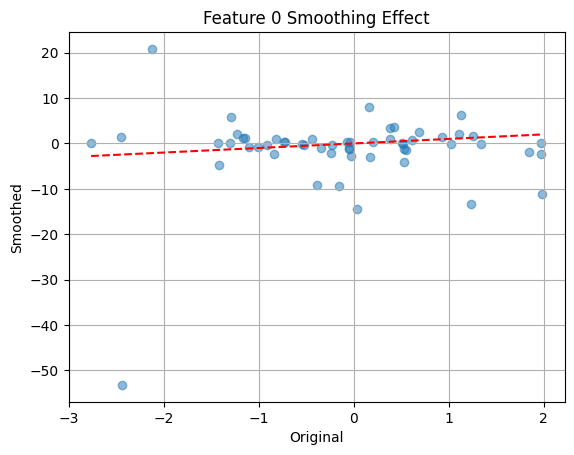

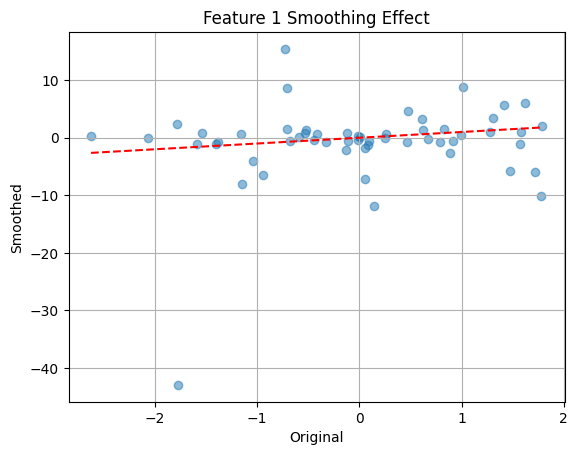

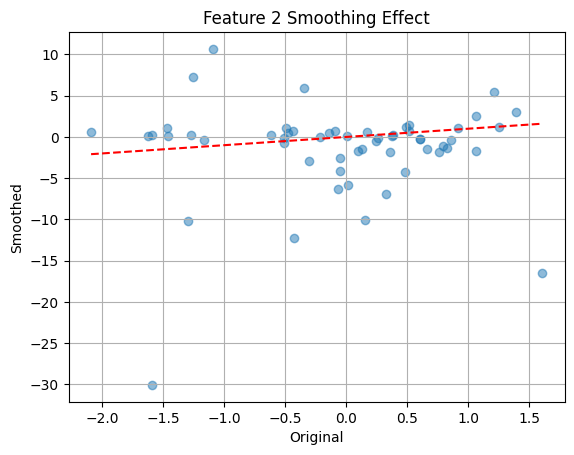

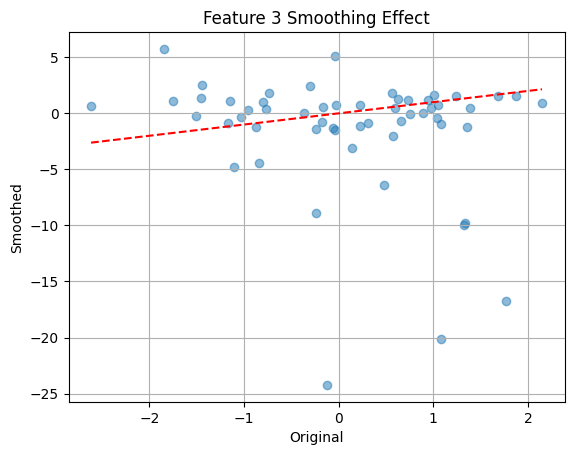

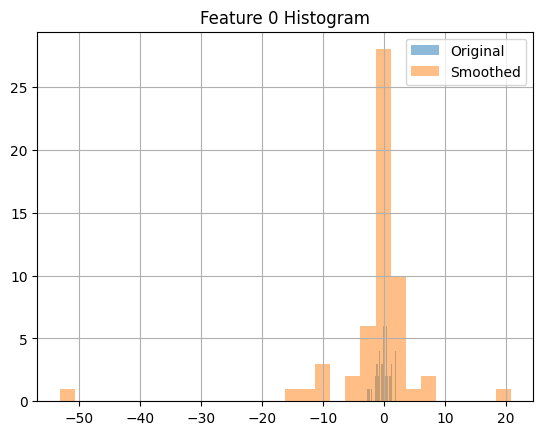

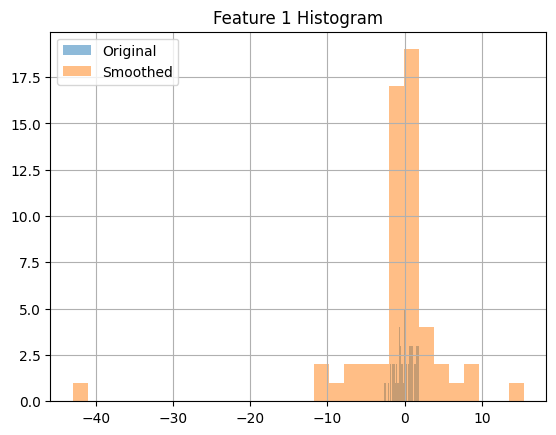

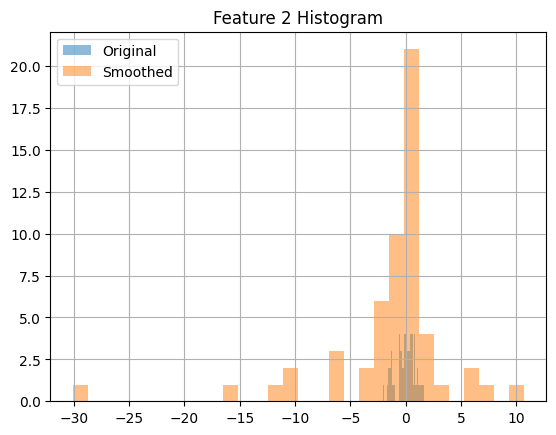

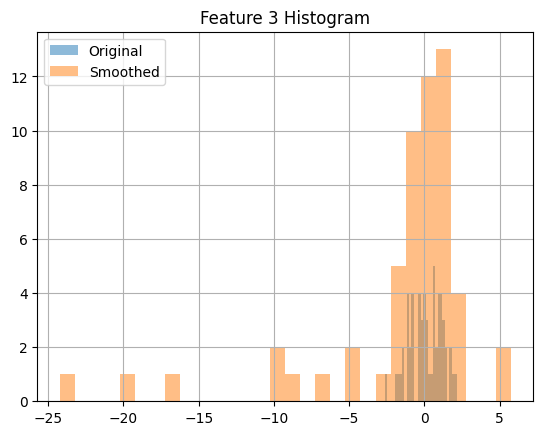

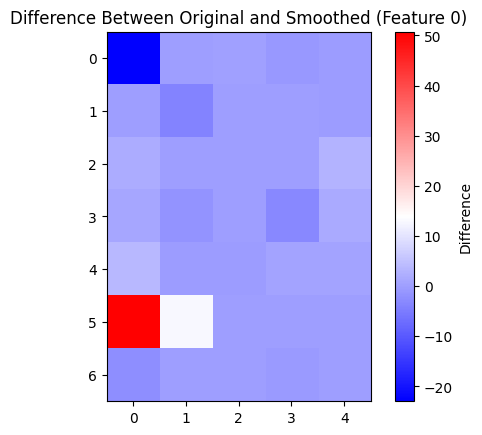

In [42]:
from scipy.spatial.distance import mahalanobis
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Generate structured data with correlation
np.random.seed(0)
# Set shape
a, b, c, d = 3, 7, 5, 4

# Generate base multivariate normal data with correlated features
mean = np.zeros(d)
cov = np.array([[1, 0.8, 0.6, 0.4],
                [0.8, 1, 0.5, 0.3],
                [0.6, 0.5, 1, 0.7],
                [0.4, 0.3, 0.7, 1]])

# Flatten batch dimensions to fill with structured data
total_samples = a * b * c
data_flat = np.random.multivariate_normal(mean, cov, size=total_samples)

# Reshape to (a, b, c, d)
data = data_flat.reshape(a, b, c, d)

# generate random data
#data = np.random.rand(3, 7, 5, 4)  # Example data
mask = np.random.rand(a,b,c) > 0.5  # Example mask
# "mahalanobis","gaussian","dot_product"
for model in ["dot_product"]:
    print(data[mask])
    smoothed_data = smoothing_function(data, mask, model)
    print(smoothed_data[mask])
    print(f"Model: {model}, Smoothed data shape: {smoothed_data.shape}")
    print(smoothed_data[mask].shape)
    print(np.max(smoothed_data[mask]))
    print(np.min(smoothed_data[mask]))
    print(np.mean(smoothed_data[mask]))
    print(np.std(smoothed_data[mask]))

    original_values = data[mask]  # shape: (N, 4)
    smoothed_values = smoothed_data[mask]  # shape: (N, 4)

    # Plot each feature dimension
    for i in range(original_values.shape[1]):
        plt.figure()
        plt.scatter(original_values[:, i], smoothed_values[:, i], alpha=0.5)
        plt.plot([original_values[:, i].min(), original_values[:, i].max()],
                [original_values[:, i].min(), original_values[:, i].max()],
                'r--')  # y = x line for reference
        plt.xlabel("Original")
        plt.ylabel("Smoothed")
        plt.title(f"Feature {i} Smoothing Effect")
        plt.grid(True)
        plt.show()
    for i in range(original_values.shape[1]):
        plt.figure()
        plt.hist(original_values[:, i], bins=30, alpha=0.5, label='Original')
        plt.hist(smoothed_values[:, i], bins=30, alpha=0.5, label='Smoothed')
        plt.title(f"Feature {i} Histogram")
        plt.legend()
        plt.grid(True)
        plt.show()

    slice_idx = 0
    original_slice = data[slice_idx, :, :, 0]
    smoothed_slice = smoothed_data[slice_idx, :, :, 0]
    mask_slice = mask[slice_idx, :, :]

    diff = np.zeros_like(original_slice)
    diff[mask_slice] = original_slice[mask_slice] - smoothed_slice[mask_slice]

    plt.imshow(diff, cmap='bwr', interpolation='none')
    plt.colorbar(label='Difference')
    plt.title('Difference Between Original and Smoothed (Feature 0)')
    plt.show()

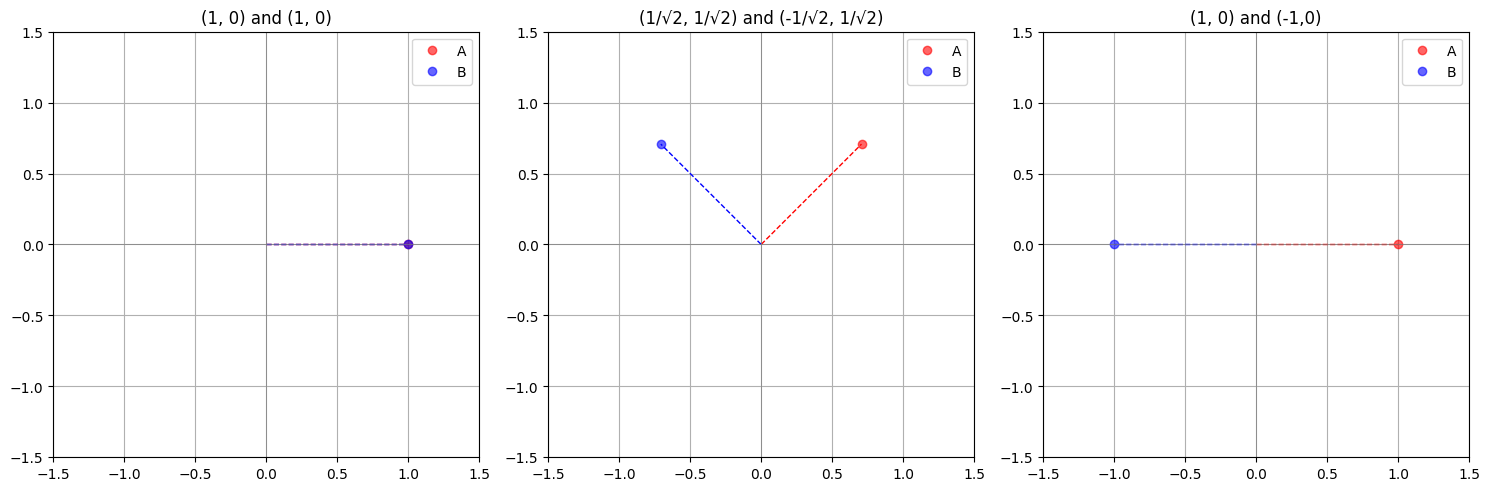

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
points_list = [
    (np.array([1, 0]), np.array([1, 0])),
    (np.array([1/np.sqrt(2), 1/np.sqrt(2)]), np.array([-1/np.sqrt(2), 1/np.sqrt(2)])),
    (np.array([1, 0]), np.array([-1, 0]))
]

titles = [
    "(1, 0) and (1, 0)",
    "(1/√2, 1/√2) and (-1/√2, 1/√2)",
    "(1, 0) and (-1,0)"
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (p1, p2), title in zip(axes, points_list, titles):
    # Plot points with transparency for visibility
    ax.plot(p1[0], p1[1], 'ro', label=f'A', alpha=0.6)  # Point A with transparency
    ax.plot(p2[0], p2[1], 'bo', label=f'B', alpha=0.6)  # Point B with transparency
    
    # Draw vector lines from origin
    ax.plot([0, p1[0]], [0, p1[1]], 'r--', linewidth=1)
    ax.plot([0, p2[0]], [0, p2[1]], 'b--', linewidth=1)

    # Axes setup
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [8]:
# load ../tmp/metrics_beta_tests.npy
# load metrics
metrics = np.load('../tmp/metrics_beta_tests.npy', allow_pickle=True).item()
# print metrics
print(metrics)

# load ../tmp/metrics_real_beta.npy
# load metrics
metrics_real = np.load('../tmp/metrics_real_beta.npy', allow_pickle=True).item()
# print metrics
print(metrics_real)

# load ../tmp/metrics_smoothed_beta_tests.npy
# load metrics
metrics_smoothed = np.load('../tmp/metrics_smoothed_beta_tests.npy', allow_pickle=True).item()
# print metrics
print(metrics_smoothed)

{'ols_no_space_correlation_float32_mae': np.float64(0.00033592454445373826), 'ols_no_space_correlation_float32_mse': np.float64(1.4301239059318255e-06), 'ols_no_space_correlation_float32_std_diff': np.float64(0.001195877880853462), 'ridge_no_space_correlation_float32_mae': np.float64(3.865770381786664), 'ridge_no_space_correlation_float32_mse': np.float64(22.729958372060253), 'ridge_no_space_correlation_float32_std_diff': np.float64(4.253696625886995), 'irls_no_space_correlation_float32_mae': np.float64(0.0003141545734852554), 'irls_no_space_correlation_float32_mse': np.float64(1.3587706693228242e-06), 'irls_no_space_correlation_float32_std_diff': np.float64(0.0011656631850591587), 'ols_space_correlation_float32_mae': np.float64(0.00042677055001478115), 'ols_space_correlation_float32_mse': np.float64(1.7337322196320648e-06), 'ols_space_correlation_float32_std_diff': np.float64(0.001316712640715139), 'ridge_space_correlation_float32_mae': np.float64(3.647028496249985), 'ridge_space_corr

In [ ]:
# load ../tmp/metrics_beta_tests.npy
# load metrics
metrics = np.load('../Figures/metrics_beta_tests.npy', allow_pickle=True).item()
# print metrics
print(metrics)

# load ../tmp/metrics_real_beta.npy
# load metrics
metrics_real = np.load('../Figures/metrics_real_beta.npy', allow_pickle=True).item()
# print metrics
print(metrics_real)

# load ../tmp/metrics_smoothed_beta_tests.npy
# load metrics
metrics_smoothed = np.load('../Figures/metrics_smoothed_beta_tests.npy', allow_pickle=True).item()
# print metrics
print(metrics_smoothed)

{'ols_no_space_correlation_float32_mae': np.float64(0.001899204541621752), 'ols_no_space_correlation_float32_mse': np.float64(0.016644228789161226), 'ols_no_space_correlation_float32_std_diff': np.float64(0.12900304164432028), 'ridge_no_space_correlation_float32_mae': np.float64(3.8666773230791396), 'ridge_no_space_correlation_float32_mse': np.float64(22.74274169498945), 'ridge_no_space_correlation_float32_std_diff': np.float64(4.254592702321536), 'irls_no_space_correlation_float32_mae': np.float64(0.0018774382671263837), 'irls_no_space_correlation_float32_mse': np.float64(0.01664415744804019), 'irls_no_space_correlation_float32_std_diff': np.float64(0.1290027640796341), 'ols_space_correlation_float32_mae': np.float64(0.0019408123534190782), 'ols_space_correlation_float32_mse': np.float64(0.019629253079421663), 'ols_space_correlation_float32_std_diff': np.float64(0.14009628170414998), 'ridge_space_correlation_float32_mae': np.float64(3.6479233564634153), 'ridge_space_correlation_float3

In [2]:
metrics_real_world = np.load('../Figures/metrics_real_beta_run_filtering_ols_True_IDS-SR30-0_to_84.npy', allow_pickle=True).item()
print(metrics_real_world)

{'ols_float32_mae': np.float64(11.311546494755952), 'ols_float32_mse': np.float64(218.047307469128), 'ols_float32_std_diff': np.float64(11.31623844895101), 'ridge_float32_mae': np.float64(11.282901977726299), 'ridge_float32_mse': np.float64(218.1006352426102), 'ridge_float32_std_diff': np.float64(11.315187407397874), 'irls_float32_mae': np.float64(11.308271674329067), 'irls_float32_mse': np.float64(218.03372448659687), 'irls_float32_std_diff': np.float64(11.313888256841318), 'lasso_float32_mae': np.float64(11.465005084348238), 'lasso_float32_mse': np.float64(224.87169850593384), 'lasso_float32_std_diff': np.float64(11.382244920076557), 'ols_float64_mae': np.float64(11.311546494755952), 'ols_float64_mse': np.float64(218.047307469128), 'ols_float64_std_diff': np.float64(11.31623844895101), 'ridge_float64_mae': np.float64(11.282901977726299), 'ridge_float64_mse': np.float64(218.1006352426102), 'ridge_float64_std_diff': np.float64(11.315187407397874), 'irls_float64_mae': np.float64(11.3082

In [2]:
import re
from collections import defaultdict
from pprint import pprint  # Optional: for debugging

raw_text = """
Data type: int16
  batched_ols: 0.022940 seconds
 batched_ols confidence interval (2.5): 0.022539 - 0.023375 seconds
 batched_ols confidence interval (10): 0.022691 - 0.023199 seconds
  batched_irls: 24.840783 seconds
 batched_irls confidence interval (2.5): 21.705794 - 42.318121 seconds
 batched_irls confidence interval (10): 21.781948 - 32.797748 seconds
  batched_ridge: 0.024448 seconds
 batched_ridge confidence interval (2.5): 0.021803 - 0.042177 seconds
 batched_ridge confidence interval (10): 0.022060 - 0.024810 seconds
  batched_lasso: 2.673668 seconds
 batched_lasso confidence interval (2.5): 2.522157 - 3.487955 seconds
 batched_lasso confidence interval (10): 2.535321 - 3.423297 seconds

Data type: float32
  batched_ols: 0.021721 seconds
 batched_ols confidence interval (2.5): 0.020977 - 0.022468 seconds
 batched_ols confidence interval (10): 0.021148 - 0.022250 seconds
  batched_irls: 18.512664 seconds
 batched_irls confidence interval (2.5): 18.062826 - 19.960458 seconds
 batched_irls confidence interval (10): 18.182871 - 18.640526 seconds
  batched_ridge: 0.023728 seconds
 batched_ridge confidence interval (2.5): 0.022855 - 0.025427 seconds
 batched_ridge confidence interval (10): 0.023168 - 0.024381 seconds
  batched_lasso: 2.841584 seconds
 batched_lasso confidence interval (2.5): 2.784109 - 2.930357 seconds
 batched_lasso confidence interval (10): 2.790817 - 2.833004 seconds

Data type: float64
  batched_ols: 0.027860 seconds
 batched_ols confidence interval (2.5): 0.026812 - 0.028898 seconds
 batched_ols confidence interval (10): 0.027037 - 0.028565 seconds
  batched_irls: 21.759340 seconds
 batched_irls confidence interval (2.5): 20.911116 - 26.748014 seconds
 batched_irls confidence interval (10): 21.000137 - 23.245532 seconds
  batched_ridge: 0.028322 seconds
 batched_ridge confidence interval (2.5): 0.027203 - 0.030134 seconds
 batched_ridge confidence interval (10): 0.027497 - 0.029068 seconds
  batched_lasso: 2.080234 seconds
 batched_lasso confidence interval (2.5): 2.074172 - 2.094632 seconds
 batched_lasso confidence interval (10): 2.075343 - 2.087165 seconds
"""

# Remove " seconds" for easier parsing
raw_text = raw_text.replace(" seconds", "")

# Prepare final data container
data = defaultdict(dict)

current_dtype = None
current_method = None

# Pattern matching
pattern_dtype = re.compile(r"Data type:\s*(\w+)")
pattern_mean = re.compile(r"\s*(batched_\w+):\s*([\d.]+)")
pattern_ci = re.compile(r"\s*(batched_\w+)\s+confidence interval\s+\(([\d.]+)\):\s*([\d.]+)\s*-\s*([\d.]+)")

for line in raw_text.strip().splitlines():
    # Match data type
    m_dtype = pattern_dtype.match(line)
    if m_dtype:
        current_dtype = m_dtype.group(1)
        continue

    # Match mean
    m_mean = pattern_mean.match(line)
    if m_mean:
        current_method = m_mean.group(1)
        mean_val = float(m_mean.group(2))
        data[current_dtype][current_method] = {"mean": mean_val}
        continue

    # Match confidence intervals
    m_ci = pattern_ci.match(line)
    if m_ci:
        method = m_ci.group(1)
        level = m_ci.group(2)
        lower = float(m_ci.group(3))
        upper = float(m_ci.group(4))
        data[current_dtype][method][f"ci_{level}"] = (lower, upper)

print(r"""
\begin{table}[ht]
\centering
\caption{Runtime Statistics over 300 Runs (in seconds)}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{Data Type} & \textbf{Method} & \textbf{Mean} & \textbf{CI (2.5\%)} & \textbf{CI (10\%)} \\
\hline
""")

for dtype, methods in data.items():
    first = True
    for method, stats in methods.items():
        row = ""
        if first:
            row += f"\\multirow{{{dtype}}} & "
            first = False
        else:
            row += "& "
        row += f"{method.replace('_', '\\_')} & {stats['mean']:.6f} & "
        row += f"{stats['ci_2.5'][0]:.6f} -- {stats['ci_2.5'][1]:.6f} & "
        row += f"{stats['ci_10'][0]:.6f} -- {stats['ci_10'][1]:.6f} \\\\"
        print(row)
    print("\\hline")

print(r"""\end{tabular}
\end{table}
""")



\begin{table}[ht]
\centering
\caption{Runtime Statistics over 300 Runs (in seconds)}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{Data Type} & \textbf{Method} & \textbf{Mean} & \textbf{CI (2.5\%)} & \textbf{CI (10\%)} \\
\hline

\multirow{int16} & batched\_ols & 0.022940 & 0.022539 -- 0.023375 & 0.022691 -- 0.023199 \\
& batched\_irls & 24.840783 & 21.705794 -- 42.318121 & 21.781948 -- 32.797748 \\
& batched\_ridge & 0.024448 & 0.021803 -- 0.042177 & 0.022060 -- 0.024810 \\
& batched\_lasso & 2.673668 & 2.522157 -- 3.487955 & 2.535321 -- 3.423297 \\
\hline
\multirow{float32} & batched\_ols & 0.021721 & 0.020977 -- 0.022468 & 0.021148 -- 0.022250 \\
& batched\_irls & 18.512664 & 18.062826 -- 19.960458 & 18.182871 -- 18.640526 \\
& batched\_ridge & 0.023728 & 0.022855 -- 0.025427 & 0.023168 -- 0.024381 \\
& batched\_lasso & 2.841584 & 2.784109 -- 2.930357 & 2.790817 -- 2.833004 \\
\hline
\multirow{float64} & batched\_ols & 0.027860 & 0.026812 -- 0.028898 & 0.027037 -- 0.028565 \\
& batch

## Create a distribution of to create B 
for regression (create gaussian noise and regional noise)
Beta comming from gaussian and uniforms
choose values to differciate between methods ridge and lasso
OLS - ordinary least squares

ridge performs better which multicolinearility

mix the coeficients 

IRLS vs WLS (weighted least square)

check the lilearn options for regression

boostrap crossval